# Tools for Analyzing Time Series of Satellite Imagery (TATSSI)

In [1]:
# Import TATSSI libraries
from helpers import utils
from TATSSI.notebooks.helpers.time_series_analysis import TimeSeriesAnalysis

## Time series analysis
For an interpolated or smoothed time series TATSSI allows the following time series (TS) analysis functions
* Decomposition
  * Computes the trend, seasonality and residuals using a simple multiplicative or additive models
* Multiple change point detections using the [changepoint](http://members.cbio.mines-paristech.fr/~thocking/change-tutorial/RK-CptWorkshop.html) package. The ```cpt.meanvar``` method has been used to capture potential changes in mean and variance. The detrended time series has been used to identify the change points.
* Climatology
  * Computes for every time step (within a calendar year) for all years in the TS:
    * The Q1, Q3, IQR, upper and lower limits, and the outliers
    * The mean and standard deviation
    
    <img src="helpers/BoxPlot_PDFs.png" alt="Drawing" align="left" style="width: 400px;"/>


Create a time series analysis ```tsa``` object.

<IPython.core.display.Javascript object>


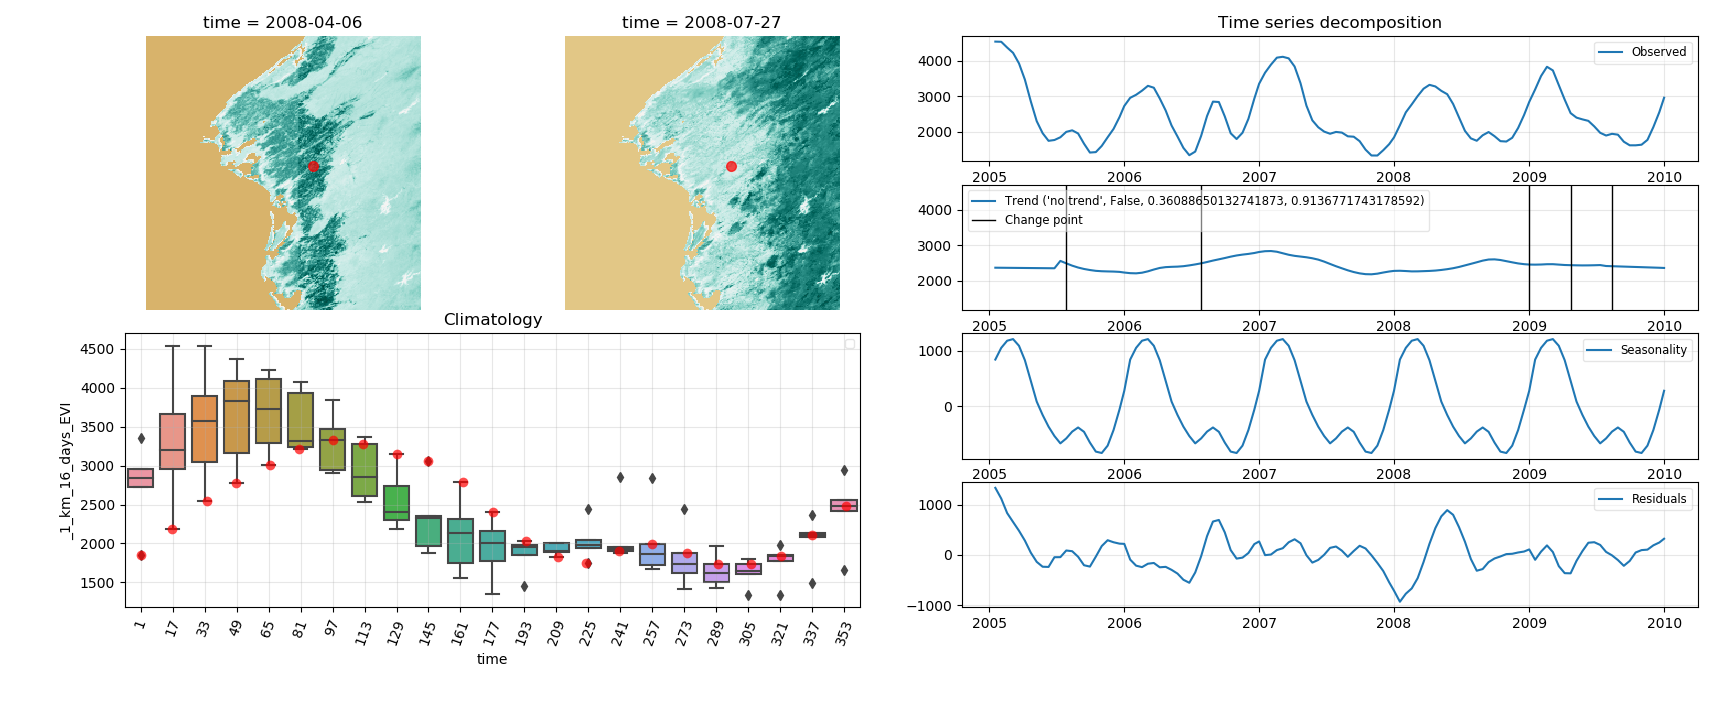

In [2]:
# Time series analysis object
tsa = None ; del tsa
#fname = '/home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/interpolated/MOD13A2.006._1_km_16_days_EVI.linear.smoothn.tif'
fname = '/home/glopez/Desktop/MOD13A2.006._1_km_16_days_EVI.linear.smoothn.tif'
tsa = TimeSeriesAnalysis(fname=fname, cmap='BrBG')

In [ ]:
tsa.debug_view

## Anomalies
TATSSI allows to compute standarized anomalies where the difference between the observations and the per-time step climatological mean is divided by the per-time step climatological standard deviation.
The ```get_climatology``` method will create two datasets:
* ```tsa.ts.climatology_mean```
* ```tsa.ts.climatology_std```

In [3]:
# Compute climatology - mean and standars deviation
# will create:
#    
tsa.get_climatology()

[########################################] | 100% Completed |  1.1s
[########################################] | 100% Completed |  3.1s


In [4]:
# Get anomalies for 2015
year = 2008

# Get EVI for doy and year
time_slice = slice(f"{year}-01-01", f"{year}-12-31")

observations = tsa.ts.data._1_km_16_days_EVI.sel(time=time_slice)

# Anomalies
anomalies = (observations - tsa.ts.climatology_mean.data) / tsa.ts.climatology_std.data
%time anomalies = anomalies.compute()

/python/anaconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)
/python/anaconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


CPU times: user 792 ms, sys: 146 ms, total: 938 ms
Wall time: 374 ms


<IPython.core.display.Javascript object>


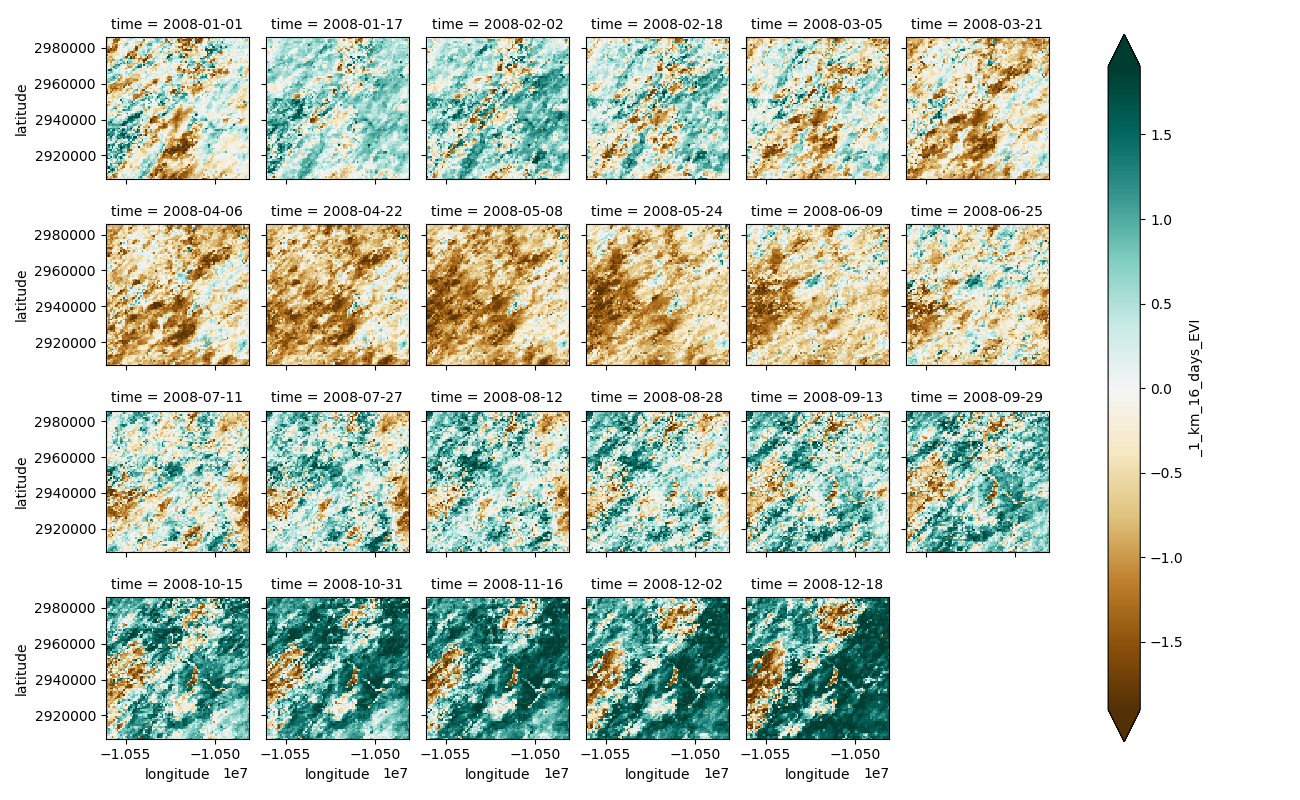

In [6]:
import matplotlib.pyplot as plt

cmap = 'BrBG'
a_plot = anomalies.plot.imshow(col='time', robust=True, col_wrap=6, cmap=cmap, aspect=1, size=2)
for _ax in a_plot.axes.ravel():
    _ax.set_aspect('equal')
    
plt.show()